# CIFAR-10読み込み
- MNISTは簡単すぎてバッチ正規化の効果がよくわからないので、もう少し難しい問題を解く。

http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz

In [1]:
from keras.datasets import cifar10
import os
import numpy as np

if os.path.exists('cifar10.npz'):
    f = np.load('cifar10.npz')
    x_train = f['x_train']
    x_test = f['x_test']
    y_train = f['y_train']
    y_test = f['y_test']
else:
    (x_train, y_train), (x_test, y_test) = cifar10.load_data()
    np.savez_compressed('cifar10', x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test)

Using TensorFlow backend.


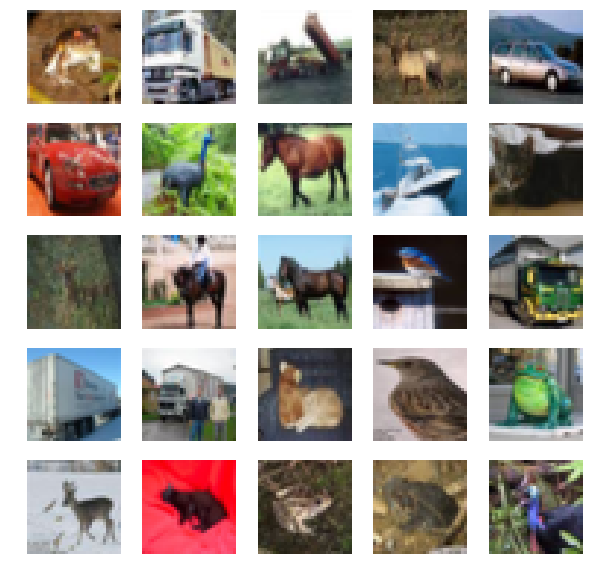

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,10))
for i,x in enumerate(x_train[:25]):
    plt.subplot(5,5,i+1)
    plt.imshow(x)
    plt.axis('off')

In [3]:
import numpy as np

x_train = np.reshape(x_train, (50000, 3072)) / 255.
x_test = np.reshape(x_test, (10000, 3072)) / 255.
y_train = np.eye(10)[y_train].squeeze()
y_trest = np.eye(10)[y_test].squeeze()

# バッチ正規化
- バッチ正規化のレイヤー名は`BatchNormalization`。
- `BatchNormalization`クラスをインスタンス化するときは引数は必要ない。
- 自分でバッチ正規化のパラメータを調整したい場合は、Kerasのサイトで`BatchNormalization`が取る引数を調べる。  
https://keras.io/ja/layers/normalization/
- 色々流儀はあるが、`Dense`（線形変換のこと）→`BatchNormalization`→`Activation`（活性化関数のこと）の順がおすすめ。
- 中間層１層（500ノード）のMLPでテストする。

In [4]:
from keras.layers import Input, Dense, BatchNormalization, Activation
from keras.models import Model

x_bn = Input((3072,))

h_bn = Dense(500)(x_bn)
h_bn = BatchNormalization()(h_bn)
h_bn = Activation('relu')(h_bn)

h_bn = Dense(10)(h_bn)
h_bn = BatchNormalization()(h_bn)
y_bn = Activation('softmax')(h_bn)

mlp_bn = Model(x_bn, y_bn)

mlp_bn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [5]:
hist_bn = mlp_bn.fit(
    x=x_train,
    y=y_train,
    epochs=30,
    batch_size=32,
    validation_split=0.1,
)

Train on 45000 samples, validate on 5000 samples
Epoch 1/30
45000/45000 [==============================] - 25s - loss: 1.6954 - acc: 0.4052 - val_loss: 1.7365 - val_acc: 0.3850
Epoch 2/30
45000/45000 [==============================] - 23s - loss: 1.5199 - acc: 0.4682 - val_loss: 1.7944 - val_acc: 0.3828
Epoch 3/30
45000/45000 [==============================] - 24s - loss: 1.4307 - acc: 0.4969 - val_loss: 1.6539 - val_acc: 0.4164
Epoch 4/30
45000/45000 [==============================] - 24s - loss: 1.3675 - acc: 0.5192 - val_loss: 1.8538 - val_acc: 0.3944
Epoch 5/30
45000/45000 [==============================] - 24s - loss: 1.3121 - acc: 0.5414 - val_loss: 1.5616 - val_acc: 0.4768
Epoch 6/30
45000/45000 [==============================] - 24s - loss: 1.2635 - acc: 0.5556 - val_loss: 1.6529 - val_acc: 0.4442
Epoch 7/30
45000/45000 [==============================] - 25s - loss: 1.2177 - acc: 0.5710 - val_loss: 1.5570 - val_acc: 0.4662
Epoch 8/30
45000/45000 [==============================]

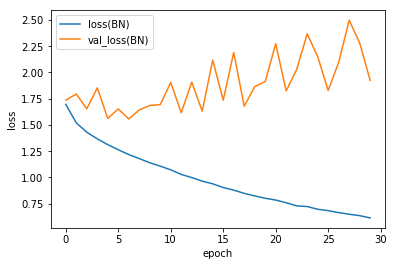

In [6]:
plt.plot(hist_bn.epoch, hist_bn.history['loss'], label='loss(BN)')
plt.plot(hist_bn.epoch, hist_bn.history['val_loss'], label='val_loss(BN)')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')

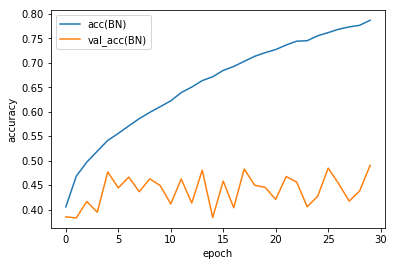

In [7]:
plt.plot(hist_bn.epoch, hist_bn.history['acc'], label='acc(BN)')
plt.plot(hist_bn.epoch, hist_bn.history['val_acc'], label='val_acc(BN)')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')

# バッチ正規化なし
- 比較のためにバッチ正規化を入れないモデルも訓練する。

In [10]:
x = Input((3072,))
h = Dense(500)(x)
h = Activation('relu')(h)
h = Dense(10)(h)
y = Activation('softmax')(h)

mlp = Model(x, y)

mlp.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [11]:
hist = mlp.fit(
    x=x_train,
    y=y_train,
    epochs=30,
    batch_size=32,
    validation_split=0.1,
)

Train on 45000 samples, validate on 5000 samples
Epoch 1/30
45000/45000 [==============================] - 22s - loss: 1.9075 - acc: 0.3224 - val_loss: 1.7721 - val_acc: 0.3708
Epoch 2/30
45000/45000 [==============================] - 21s - loss: 1.7196 - acc: 0.3822 - val_loss: 1.6962 - val_acc: 0.4000
Epoch 3/30
45000/45000 [==============================] - 21s - loss: 1.6579 - acc: 0.4066 - val_loss: 1.6400 - val_acc: 0.4132
Epoch 4/30
45000/45000 [==============================] - 21s - loss: 1.6108 - acc: 0.4255 - val_loss: 1.6186 - val_acc: 0.4226
Epoch 5/30
45000/45000 [==============================] - 21s - loss: 1.5797 - acc: 0.4357 - val_loss: 1.6875 - val_acc: 0.3940
Epoch 6/30
45000/45000 [==============================] - 21s - loss: 1.5542 - acc: 0.4438 - val_loss: 1.6136 - val_acc: 0.4248
Epoch 7/30
45000/45000 [==============================] - 21s - loss: 1.5363 - acc: 0.4535 - val_loss: 1.6154 - val_acc: 0.4262
Epoch 8/30
45000/45000 [==============================]

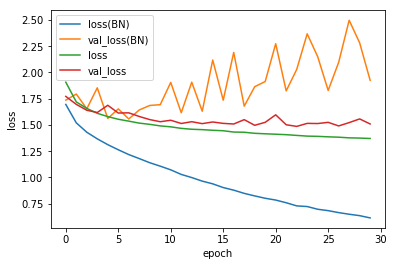

In [12]:
# バッチ正規化あり
plt.plot(hist_bn.epoch, hist_bn.history['loss'], label='loss(BN)')
plt.plot(hist_bn.epoch, hist_bn.history['val_loss'], label='val_loss(BN)')

# バッチ正規化なし
plt.plot(hist.epoch, hist.history['loss'], label='loss')
plt.plot(hist.epoch, hist.history['val_loss'], label='val_loss')

plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')

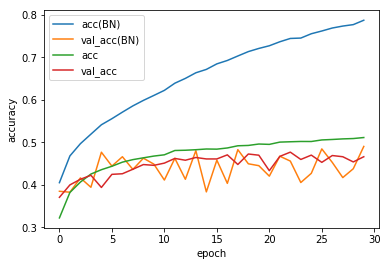

In [13]:
# バッチ正規化あり
plt.plot(hist_bn.epoch, hist_bn.history['acc'], label='acc(BN)')
plt.plot(hist_bn.epoch, hist_bn.history['val_acc'], label='val_acc(BN)')

# バッチ正規化なし
plt.plot(hist.epoch, hist.history['acc'], label='acc')
plt.plot(hist.epoch, hist.history['val_acc'], label='val_acc')

plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')